<h1 style="text-align: center;">Spacy Language Processing Pipelines</h1>

##### spaCy is a powerful NLP library that uses a structured processing pipeline to analyze text.

key components:

Tokenizer: Splits the text into individual tokens (words and punctuation).

Tagger: Assigns part-of-speech tags to each token.

Lemmatizer: Converts words to their base forms (lemmas).

Parser: Analyzes grammatical structure and relationships between tokens.

Entity Recognizer (NER): Identifies and categorizes named entities (like people, places, organizations).

#### Blank nlp pipeline

In [1]:
import spacy

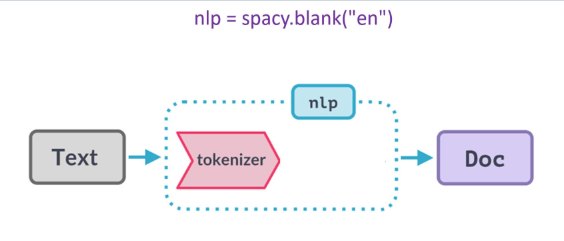

In [4]:
nlp = spacy.blank("en")

doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


In [5]:
nlp.pipe_names

[]

nlp.pipe_names is empty array indicating no components in the pipeline. Pipeline is something that starts with a tokenizer

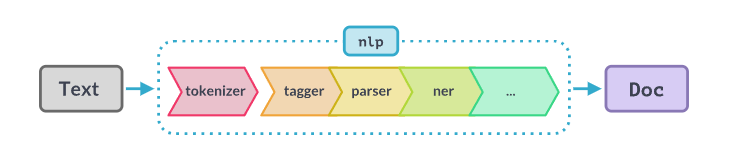

#### Download trained pipeline
To download trained pipeline use a command such as,

python -m spacy download en_core_web_sm

This downloads the small (sm) pipeline for english language

In [13]:
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [8]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -------- ------------------------------- 2.6/12.8 MB 13.7 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.8 MB 13.3 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 13.5 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 13.6 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 12.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 12.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1839d1c3b90>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1839ac55e50>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1839d2115b0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x183a4159750>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x183a415a9d0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1839cd46810>)]

In [16]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token," | ",token.pos_," | ",token.lemma_)

Captain  |  PROPN  |  Captain
america  |  PROPN  |  america
ate  |  VERB  |  eat
100  |  NUM  |  100
$  |  NUM  |  $
of  |  ADP  |  of
samosa  |  PROPN  |  samosa
.  |  PUNCT  |  .
Then  |  ADV  |  then
he  |  PRON  |  he
said  |  VERB  |  say
I  |  PRON  |  I
can  |  AUX  |  can
do  |  VERB  |  do
this  |  PRON  |  this
all  |  DET  |  all
day  |  NOUN  |  day
.  |  PUNCT  |  .


#### Named Entity Recognition

In [20]:
doc = nlp("Dhanashri Fabricators is going to acquire sales of for $45 billion")
for ent in doc.ents:
    print(ent.text, " | ",ent.label_, " | ",spacy.explain(ent.label_))

Dhanashri Fabricators  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


In [21]:
from spacy import displacy

displacy.render(doc, style="ent")

#### Adding a component to a blank pipeline

In [22]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']

In [59]:
doc = nlp("Dhanashri Fabricators is going to acquire sales of for $45 billion")
for ent in doc.ents:
    print(ent.text, " | ",ent.label_, " | ",spacy.explain(ent.label_))

Dhanashri Fabricators  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


<h1 style="text-align: center;">Spacy Language Processing Pipelines: Exercises</h1>

#### Excersie: 1
Get all the proper nouns from a given text in a list and also count how many of them.
Proper Noun means a noun that names a particular person, place, or thing.

In [39]:
nlp = spacy.load("en_core_web_sm")  

In [40]:
text = '''Ravi and Raju are the best friends from school days.They wanted to go for a world tour and 
visit famous cities like Paris, London, Dubai, Rome etc and also they called their another friend Mohan to take part of this world tour.
They started their journey from Hyderabad and spent next 3 months travelling all the wonderful cities in the world and cherish a happy moments!
'''

# https://spacy.io/usage/linguistic-features

#creating the nlp object
doc = nlp(text)   

In [48]:
all_proper_noun  =[]
for token in doc:
    if token.pos_ == "PROPN":
        all_proper_noun.append(token)

print("Proper Noun : ",all_proper_noun)
print("Proper Noun Count : ",len(all_proper_noun))

Proper Noun :  [Raju, Paris, London, Dubai, Rome, Mohan, Hyderabad]
Proper Noun Count :  7


#### Excersie: 2
Get all companies names from a given text and also the count of them.
Hint: Use the spacy ner functionality

In [57]:
text = '''The Top 6 companies in USA are Dhanashri Fabricators,Tesla, Walmart, Amazon, Microsoft, Google and the top 5 companies in 
India are Infosys, Reliance, HDFC Bank, Hindustan Unilever and Bharti Airtel'''


doc = nlp(text)

In [58]:
companies  =[]
for ent in doc.ents:
    if ent.label_ == "ORG":
        companies.append(ent)

print("Companies : ",companies)


Companies :  [Dhanashri Fabricators, Tesla, Walmart, Amazon, Microsoft, Google, Infosys, Reliance, HDFC Bank, Hindustan Unilever, Bharti Airtel]
